In [1]:
from modules import * 
from modules.utils import *

In [2]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [3]:
def train_knn(X_train, y_train, X_test, y_test, handle_imbalance=None, n_neighbors=5):
    
    if handle_imbalance == 'smote':
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        X_train, y_train = X_train_resampled, y_train_resampled
        imbalance_label = "SMOTE"
        print("Using SMOTE for class imbalance in KNN.")
    
    else:
        
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        imbalance_label = "No Weights"
        print("Training KNN without handling class imbalance.")
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
   
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    
    

    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=f'KNN ({imbalance_label})')
    if y_probs is not None:
        plot_roc_curve(y_test, y_probs, model_name=f'KNN ({imbalance_label})')
    
    return model, y_pred, y_probs


Training KNN without handling class imbalance.


<Figure size 640x480 with 0 Axes>

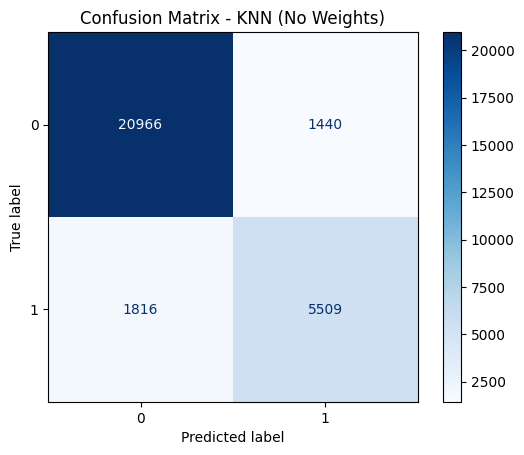

KNN (No Weights) Metrics:
Accuracy: 0.8905
Precision: 0.7928
Recall: 0.7521
F1 Score: 0.7719
ROC-AUC Score: 0.9412


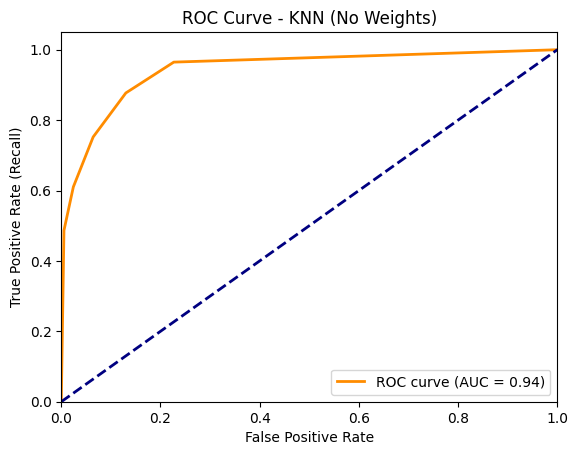

KNN (No Weights) ROC-AUC Score: 0.94
Using SMOTE for class imbalance in KNN.


<Figure size 640x480 with 0 Axes>

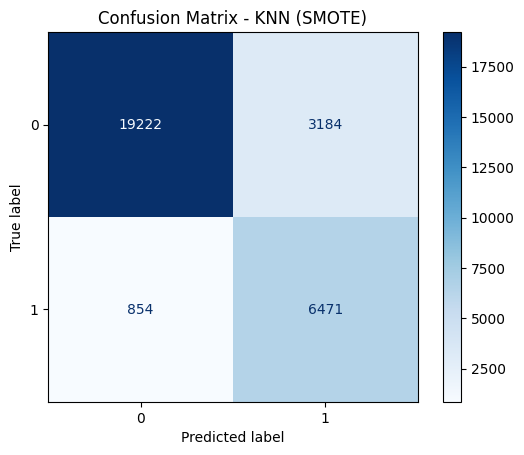

KNN (SMOTE) Metrics:
Accuracy: 0.8642
Precision: 0.6702
Recall: 0.8834
F1 Score: 0.7622
ROC-AUC Score: 0.9353


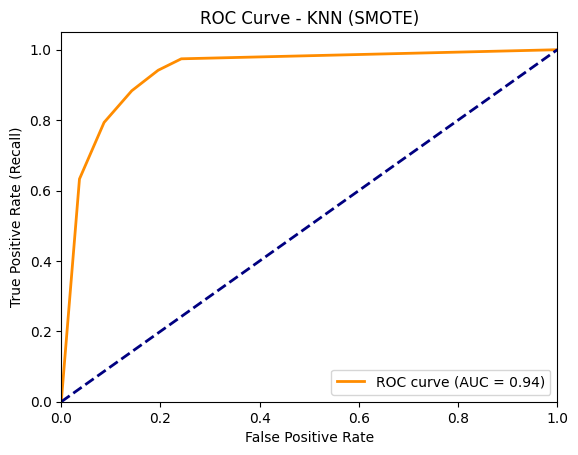

KNN (SMOTE) ROC-AUC Score: 0.94


(KNeighborsClassifier(),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [4]:
train_knn(X_train, y_train, X_test, y_test, handle_imbalance=None)

train_knn(X_train, y_train, X_test, y_test, handle_imbalance='smote')
